<a href="https://colab.research.google.com/github/Dhawaldwivedi/Bca-5th-sem-AI-mmdu/blob/main/ai-ml2-g2/Brain_Tumor_Detection_using_CNN_BCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

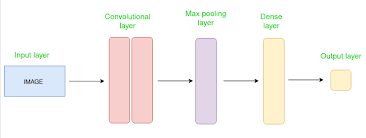

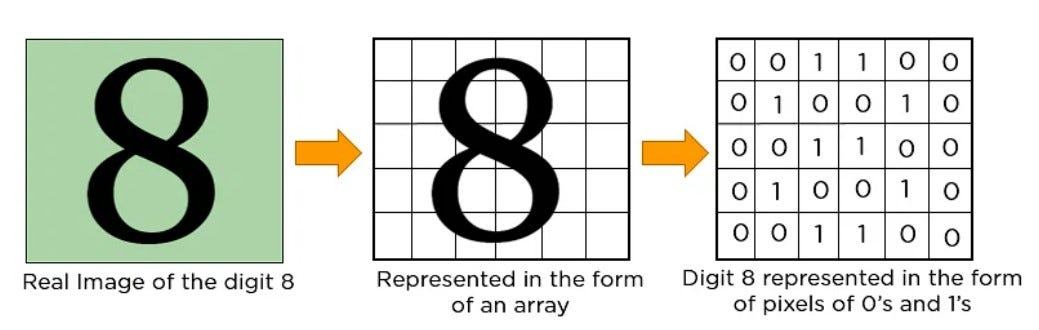

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
import zipfile
# Step 2: Extract the archive.zip
zip_filename = "archive.zip"
extract_dir = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(" Extraction Done!")
print(" Extracted folders:", os.listdir(extract_dir))

 Extraction Done!
 Extracted folders: ['no', 'yes', 'brain_tumor_dataset']


In [3]:
# Try to detect the path that contains 'yes' and 'no' folders
base_path = extract_dir
subfolders = os.listdir(base_path)

# If there's an extra folder inside, dive one level deeper
if 'yes' not in subfolders and 'no' not in subfolders:
    base_path = os.path.join(base_path, subfolders[0])  # first inner folder
    print(f"Adjusted base path to: {base_path}")

# Final check
print(" Dataset Path:", base_path)
print("Folders:", os.listdir(base_path))


 Dataset Path: /content/brain_tumor_dataset
Folders: ['no', 'yes', 'brain_tumor_dataset']


In [4]:

# Step 4: Load Dataset (Using Encoder-Based Labeling)

from PIL import Image
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

data = []
result = []

# Initialize OneHotEncoder for binary labels (0 = Tumor, 1 = No Tumor)
encoder = OneHotEncoder()
encoder.fit([[0], [1]])   # two categories: yes (0), no (1)

# Paths for 'yes' and 'no' folders
yes_path = os.path.join(base_path, "yes")
no_path  = os.path.join(base_path, "no")

image_size = 128  # as per data

# ----------------------
#  Load Tumor Images
# ----------------------
paths = []
for r, d, f in os.walk(yes_path):
    for file in f:
        if file.lower().endswith('.jpg'):
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((image_size, image_size))
    img = np.array(img)
    if img.shape == (image_size, image_size, 3):
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())  # Tumor (Yes)

# ----------------------
#  Load Non-Tumor Images
# ----------------------
paths = []
for r, d, f in os.walk(no_path):
    for file in f:
        if file.lower().endswith('.jpg'):
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((image_size, image_size))
    img = np.array(img)
    if img.shape == (image_size, image_size, 3):
        data.append(img)
        result.append(encoder.transform([[1]]).toarray())  # No Tumor


In [5]:
data = np.array(data)
data.shape

(213, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(213,2)
print(result)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [10]:
y_train.shape

(170, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - loss: 35.6598 - val_loss: 99.1729
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 15.5293 - val_loss: 29.3659
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 6.6578 - val_loss: 27.7224
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.6581 - val_loss: 3.5892
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.4986 - val_loss: 4.2922
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.4246 - val_loss: 6.9452
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.2955 - val_loss: 3.4604
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.6198 - val_loss: 1.5013
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4520 - val_loss: 1.2227
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2303 - val_loss: 1.0748
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3359 - val_loss: 1.2817
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1473 - val_loss: 1.30

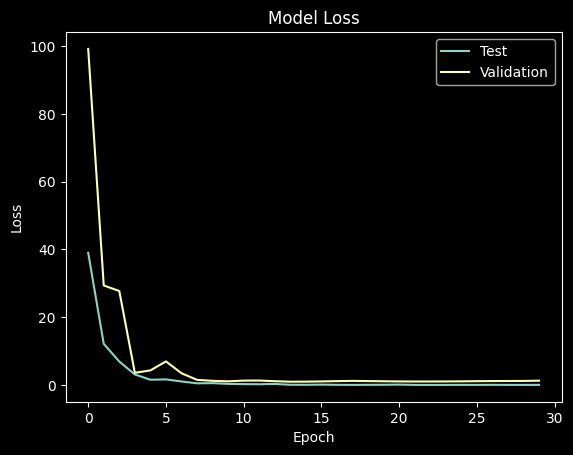

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [13]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


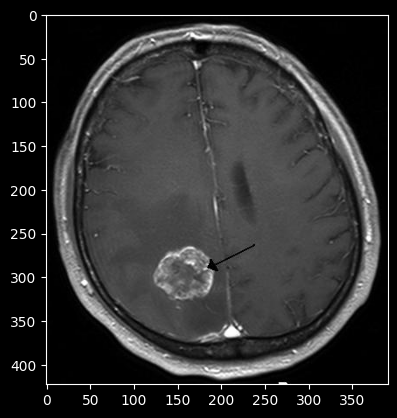

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor yes 1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.999985% Confidence This Is Its a Tumor


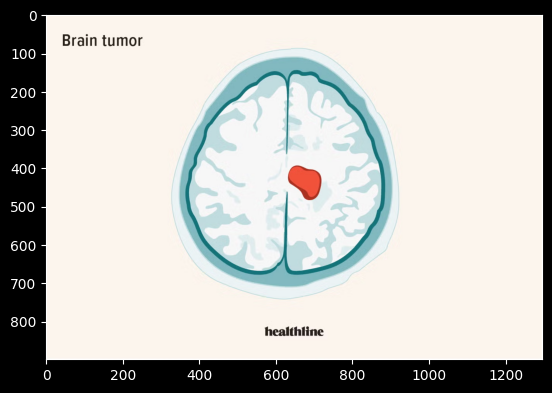

In [15]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor yes 2.avif")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

76.85238% Confidence This Is No, Its not a tumor


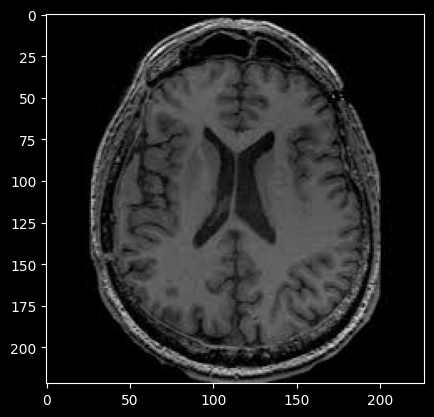

In [16]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor no 1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
model.save("BrainTumorModel.h5")

99.999985% Confidence This Is No, Its not a tumor


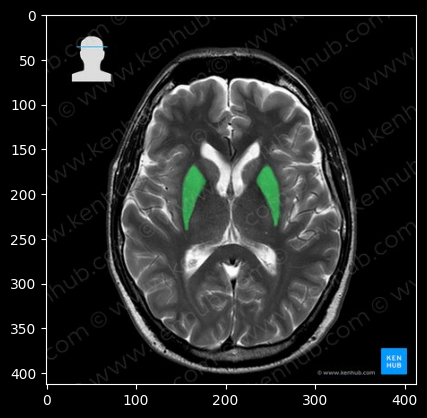

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/brain tumor no 2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))